# Data preprocessing
*Objective:* Prepare the data (cleaning, normalization, etc.) before using it in the machine learning model

In [84]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('../data/creditcard.csv')

In [85]:
# Display some infos about the dataset
df.head(5)
# df.info()

# Display the sum of NaN
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Distribution Analysis
*Understanding class imbalance*

In [86]:
df['Class'].value_counts()

# So we have 492 fraud detections

Class
0    284315
1       492
Name: count, dtype: int64

In [87]:
float((df['Class'].sum() / len(df) * 100))

# Fraud detections represents 0.17% of the dataset

0.1727485630620034

<Axes: xlabel='Class', ylabel='count'>

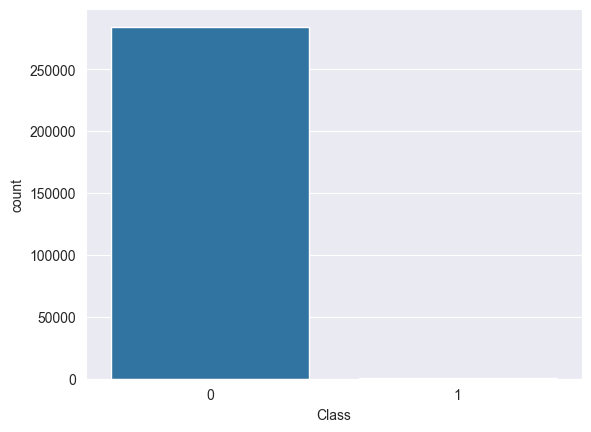

In [88]:
sns.countplot(x='Class', data=df)

## Correlation analysis

<Axes: >

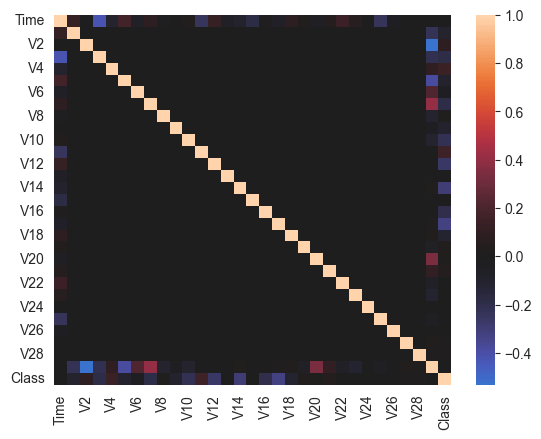

In [89]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, center=0)

In [90]:
correlation_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

**Analysis of Features Time and Amount**

<Axes: xlabel='Class', ylabel='Amount'>

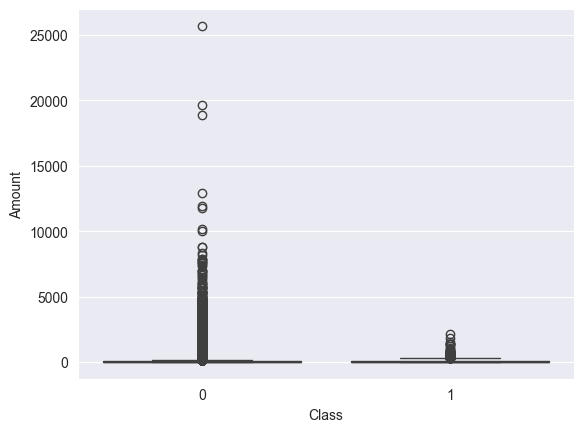

In [91]:
sns.boxplot(x='Class', y='Amount', data=df)

# We can see that the fraud concern relatively small amounts

<Axes: xlabel='Class', ylabel='Time'>

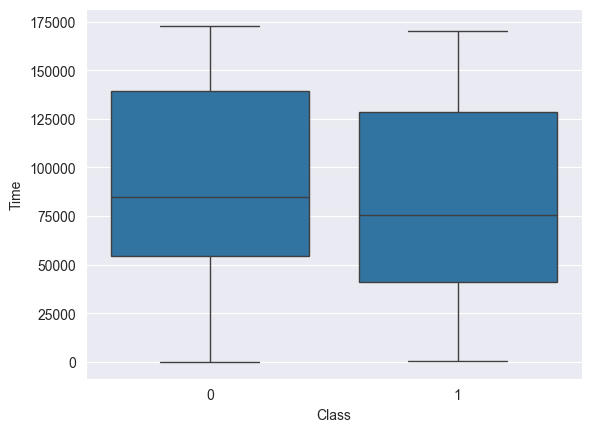

In [92]:
sns.boxplot(x='Class', y='Time', data=df)

# We can see that the medians and ranges are almost the same so frauds do not occur at a specific time

In [93]:
# Create new dataset
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

fraud_sample = fraud.sample(n=400, random_state=42)
normal_sample = normal.sample(n=400, random_state=42)

update_df = pd.concat([fraud_sample, normal_sample]).sample(frac=1, random_state=42)
update_df.to_csv("../data/updateData.csv", index=False)
df = pd.read_csv("../data/updateData.csv")

# Split dataset

## Normalize features Amount and Time
*We need to normalize because the values of the V variables are already normalized between -5 and +5. So if Time and Amount are too high it risks biasing the model.*

In [94]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
# Normalisation de la variable Amount avec RobustScaler
scaler = RobustScaler()

X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.fit_transform(X_test[['Amount', 'Time']])

In [96]:
print(X_train[['Amount', 'Time']].describe())

           Amount        Time
count  640.000000  640.000000
mean     0.853818    0.065519
std      2.284559    0.528390
min     -0.171339   -0.907193
25%     -0.159397   -0.422723
50%      0.000000    0.000000
75%      0.840603    0.577277
max     21.343386    0.982558


In [97]:
# Export data
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)